In [1]:
import anndata as ad
import scanpy as sc
import scvi
import numpy as np
import pandas as pd

/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad('../examples/data/mouseBrain.h5ad')
adata.obs['donor_slice'] = adata.obs['donor_id'].astype(str) + '_' + adata.obs['slice'].astype(str)
ids = adata.obs['donor_slice'].unique().tolist()

train_Xs = []
chosen_slices = ['MsBrainAgingSpatialDonor_5_0', 'MsBrainAgingSpatialDonor_6_0', 
                 'MsBrainAgingSpatialDonor_7_0']
for i in chosen_slices:
    train_Xs.append(np.array(adata.X[adata.obs['donor_slice'] == i, :]))
    
validate_Xs = []
chosen_donors = ['MsBrainAgingSpatialDonor_8_0']
for i in chosen_donors:
    validate_Xs.append(np.array(adata.X[adata.obs['donor_slice'] == i, :]))

In [3]:
adata.obs_keys
adata.X = abs(adata.X)

In [4]:
scvi.model.SCVI.setup_anndata(adata, batch_key='donor_slice', labels_key='cell_type')
vae = scvi.model.SCVI(adata, n_latent=16, n_layers=2)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [5]:
vae.train(batch_size=512)
adata.obsm['X_scVI'] = vae.get_latent_representation()
adata.obsm["X_normalized_scVI"] = vae.get_normalized_expression()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Epoch 1/21:   0%|          | 0/21 [00:00<?, ?it/s]

/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/21:   5%|▍         | 1/21 [00:06<02:02,  6.11s/it, v_num=1, train_loss_step=373, train_loss_epoch=408]

/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 21/21: 100%|██████████| 21/21 [01:51<00:00,  5.17s/it, v_num=1, train_loss_step=319, train_loss_epoch=324]

`Trainer.fit` stopped: `max_epochs=21` reached.


Epoch 21/21: 100%|██████████| 21/21 [01:51<00:00,  5.32s/it, v_num=1, train_loss_step=319, train_loss_epoch=324]


In [6]:
# save data
adata.write_h5ad('../examples/data/mouseBrainSCVI.h5ad')

/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_

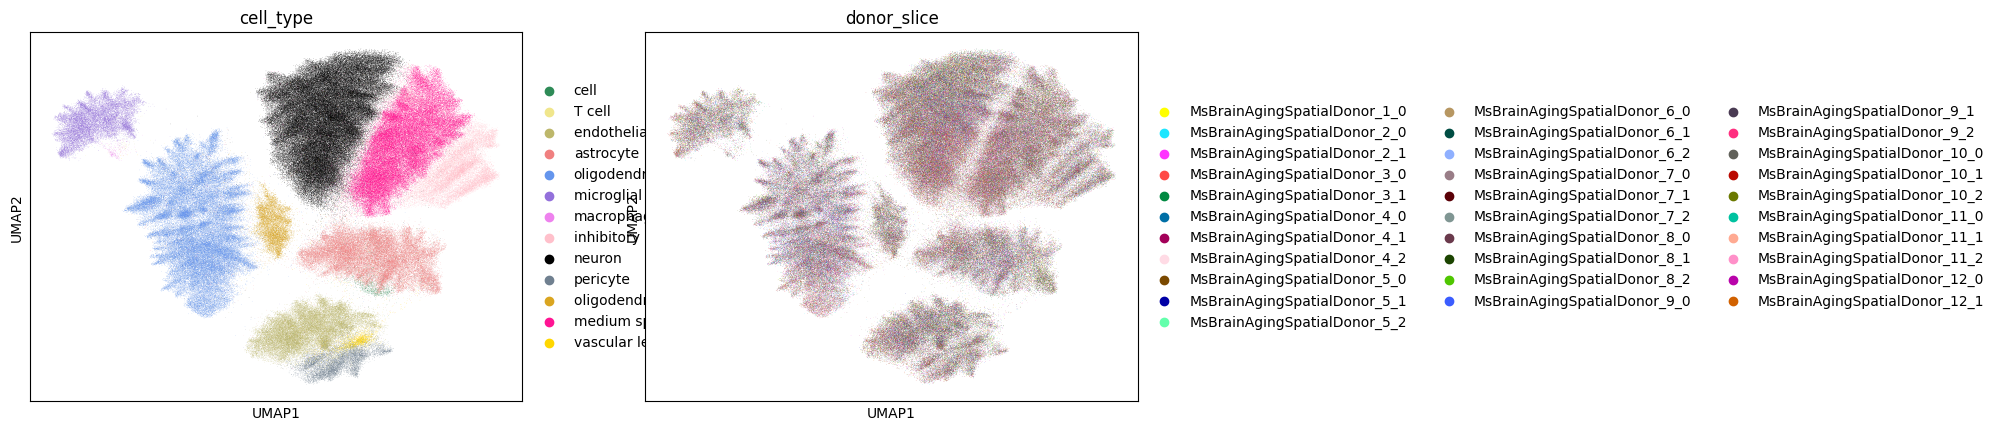

In [7]:
# visualize obsm['X_scVI']
sc.pp.neighbors(adata, use_rep='X_scVI')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type', 'donor_slice'])


/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/caoyufan/miniconda3/envs/kuanglu/lib/python3.11/site-packages/scanpy/plotting/_

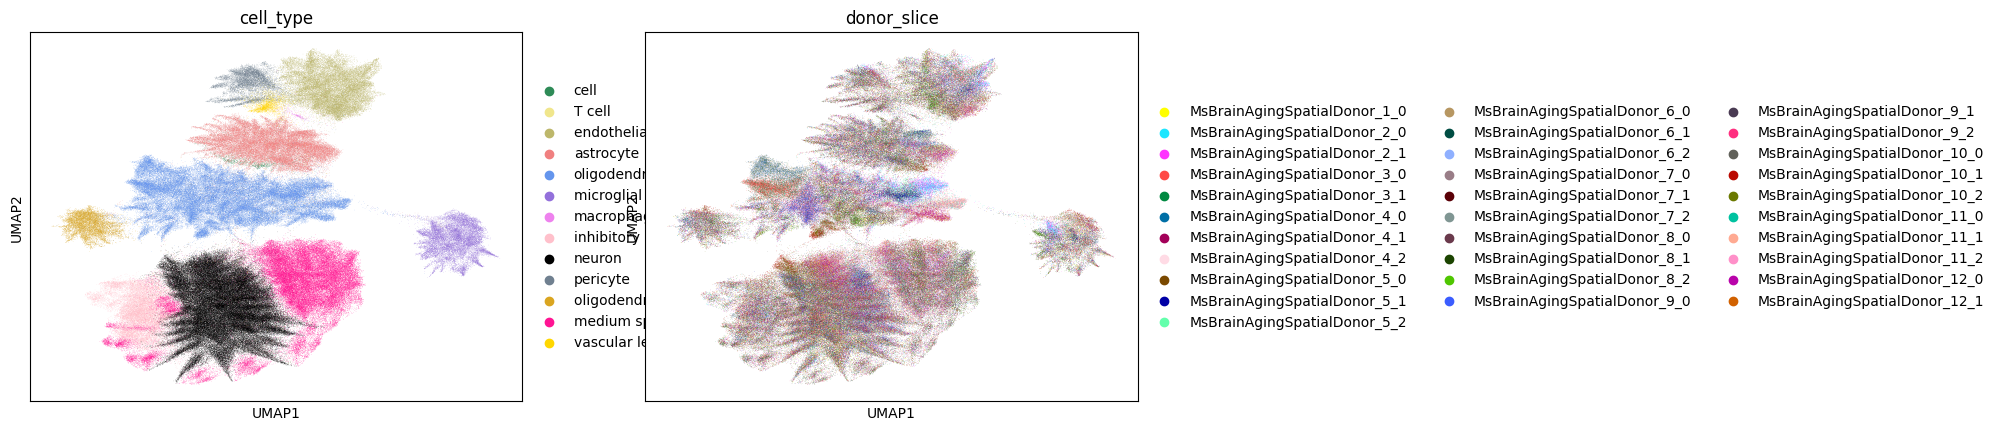

In [8]:
# visualize obsm['X_scVI']
sc.pp.neighbors(adata, use_rep='X_normalized_scVI')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type', 'donor_slice'])
